In [1]:
import pandas as pd
import numpy as np

In [37]:
#Load Data
all = pd.read_csv("data.csv")
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [38]:
all.shape

(186850, 6)

In [39]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [40]:
all.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [42]:
# Find NAN
df = all[all.isna().any(axis=1)]
print(df.head())

all = all.dropna(how='all')
all.head()

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [43]:
#Get rid of text in order date column
all = all[all['Order Date'].str[0:2]!='Or']

In [48]:
#Change data Type
all['Quantity Ordered'] = pd.to_numeric(all['Quantity Ordered'])
all['Price Each'] = pd.to_numeric(all['Price Each'])


In [91]:
all.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [ ]:
all.dtypes

In [45]:
all['Month'] = pd.to_datetime(all['Order Date']).dt.month
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


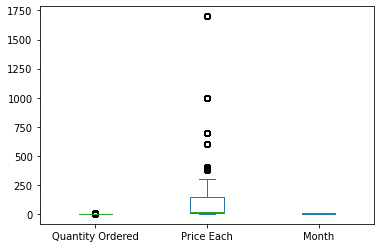

In [134]:
import matplotlib.pyplot as plt
all.plot.box()
plt.show()


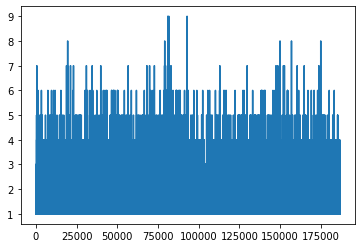

In [130]:

all["Quantity Ordered"].plot()
plt.show()


# **Describe**

In [46]:
all.describe()

,Quantity Ordered,Price Each,Month
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,7.059140
std,0.442793,332.731330,3.502996
min,1.000000,2.990000,1.000000
25%,1.000000,11.950000,4.000000
50%,1.000000,14.950000,7.000000
75%,1.000000,150.000000,10.000000
max,9.000000,1700.000000,12.000000


In [56]:
all.describe().loc[['count','std']]

,Quantity Ordered,Price Each,Month
count,185950.000000,185950.00000,185950.000000
std,0.442793,332.73133,3.502996


In [63]:
all.describe().loc[['count','min']]

,Quantity Ordered,Price Each,Month
count,185950.0,185950.00,185950.0
min,1.0,2.99,1.0


In [65]:
df_grouped=all.groupby(by='Quantity Ordered')  
df_grouped.agg([np.mean, len])

Order ID          Price Each             Month        
                           mean     len        mean     len      mean     len
Quantity Ordered                                                             
1                           inf  168552  202.368658  168552  7.058949  168552
2                           inf   13324   12.140264   13324  7.061243   13324
3                           inf    2920    4.681062    2920  7.027740    2920
4                           inf     806    3.636079     806  7.178660     806
5                           inf     236    3.276483     236  6.766949     236
6                           inf      80    3.272000      80  7.662500      80
7                 7.381677e+141      24    3.060833      24  7.500000      24
8                  4.756144e+28       5    2.990000       5  9.200000       5
9                  7.549441e+16       3    2.990000       3  6.666667       3

# **loc**

In [94]:
all[["Price Each"]].describe().loc[['std']]

,Price Each
std,332.73133


# **iloc**

In [126]:
all.iloc[[0]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4


In [127]:
all.iloc[[2]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4


# **Subsets**

In [96]:
df=all['Quantity Ordered']
print(df.head())

0    2
2    1
3    1
4    1
5    1
Name: Quantity Ordered, dtype: int64


In [101]:
df=all[["Price Each","Month"]]
print(df.head())

   Price Each  Month
0       11.95      4
2       99.99      4
3      600.00      4
4       11.99      4
5       11.99      4


In [104]:
df=all[['Price Each']]
print(df.head())

   Price Each
0       11.95
2       99.99
3      600.00
4       11.99
5       11.99


# **Arithmatic**

In [111]:
df = all[all["Price Each"] > 600]

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
26,176581,iPhone,1,700.00,04/09/19 21:38,"84 Jackson St, Boston, MA 02215",4
55,176608,iPhone,1,700.00,04/11/19 12:01,"15 Cherry St, San Francisco, CA 94016",4
80,176633,ThinkPad Laptop,1,999.99,04/23/19 14:03,"863 Hickory St, Los Angeles, CA 90001",4
86,176639,Macbook Pro Laptop,1,1700.00,04/28/19 16:14,"853 Cedar St, San Francisco, CA 94016",4


In [109]:
df = all[all["Price Each"] < 100]

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4


# write a code to find out how many different products available in dataframe with price and quantity


# **GroupTask**

In [121]:
print( all.groupby('Product')['Quantity Ordered'].count() )

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Quantity Ordered, dtype: int64


In [122]:
print(all.groupby('Product')['Price Each'].count())

Product
20in Monitor                   4101
27in 4K Gaming Monitor         6230
27in FHD Monitor               7507
34in Ultrawide Monitor         6181
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
Flatscreen TV                  4800
Google Phone                   5525
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21658
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
USB-C Charging Cable          21903
Vareebadd Phone                2065
Wired Headphones              18882
iPhone                         6842
Name: Price Each, dtype: int64
